# CALORIES

### Import Packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./dataGit/DataSet/bodyPerformance.csv')
data.head()

,age,gender,height_cm,weight_kg,sit and bend forward_cm,sit-ups counts,class
0,27,M,172.3,75.24,18.4,60.0,C
1,25,M,165.0,55.80,16.3,53.0,A
2,31,M,179.6,78.00,12.0,49.0,C
3,32,M,174.5,71.10,15.2,53.0,B
4,28,M,173.8,67.70,27.1,45.0,B


In [3]:
def add_Gender(inpt):
    if inpt == 'M':
        return '1'
    if inpt  == 'F':
        return '0'
    
data['gender'] = data['gender'].apply(add_Gender)

In [4]:
def add_Class(inpt):
    if inpt == 'A':
        return '2'
    if inpt  == 'B':
        return '1'
    if inpt  == 'C':
        return '1'
    if inpt  == 'D':
        return '0'
    
data['class'] = data['class'].apply(add_Class)

### Display Number of Rows, Columns

In [5]:
data.shape

(13393, 7)

### Number of Missing Values in the Dataset

In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
sit and bend forward_cm    0
sit-ups counts             0
class                      0
dtype: int64

### Drop Columns

In [7]:
data.head()

,age,gender,height_cm,weight_kg,sit and bend forward_cm,sit-ups counts,class
0,27,1,172.3,75.24,18.4,60.0,1
1,25,1,165.0,55.80,16.3,53.0,2
2,31,1,179.6,78.00,12.0,49.0,1
3,32,1,174.5,71.10,15.2,53.0,1
4,28,1,173.8,67.70,27.1,45.0,1


In [8]:
data = data.fillna(0)

In [9]:
data['gender']=data['gender'].astype(np.int64)
data['height_cm']=data['height_cm'].astype(np.int64)
data['weight_kg']=data['weight_kg'].astype(np.int64)
data['sit and bend forward_cm']=data['sit and bend forward_cm'].astype(np.int64)
data['sit-ups counts']=data['sit-ups counts'].astype(np.int64)
data['class']=data['class'].astype(np.int64)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      13393 non-null  int64
 1   gender                   13393 non-null  int64
 2   height_cm                13393 non-null  int64
 3   weight_kg                13393 non-null  int64
 4   sit and bend forward_cm  13393 non-null  int64
 5   sit-ups counts           13393 non-null  int64
 6   class                    13393 non-null  int64
dtypes: int64(7)
memory usage: 732.6 KB


### Find the Feature Importance

<AxesSubplot:>

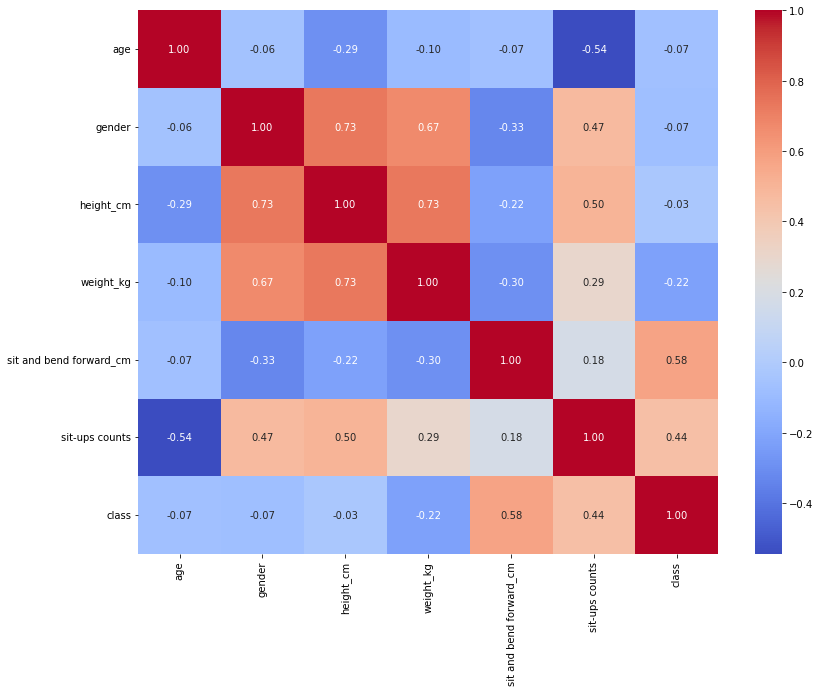

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### Split the Dataset

In [12]:
x = data.drop('class',axis=1)
y = data['class']

In [13]:
y.value_counts()

1    6696
0    3349
2    3348
Name: class, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.20)

In [15]:
X_train.shape

(10714, 6)

In [16]:
X_test.shape

(2679, 6)

### Create Function for Output Training and Testing Accuracy without using Cross Validation

In [23]:
def model_acc(model):
    model.fit(X_train.values,Y_train.values)
    acc1 = model.score(X_train.values,Y_train.values)
    acc2 = model.score(X_test.values,Y_test.values)
    print(str(model)+' Training Accuracy --> '+str(acc1))
    print(str(model)+' Testing Accuracy --> '+str(acc2))

### Create Function for Output Training and Testing Accuracy using Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
def model_acc_cross_val(model):
    model.fit(X_train.values,Y_train.values)
    acc1 = cross_val_score(model,X_train,Y_train, cv=5).mean()
    acc2 = cross_val_score(model,X_test.values,Y_test, cv=5).mean()
    print(str(model)+' Training Accuracy --> '+str(acc1))
    print(str(model)+' Testing Accuracy --> '+str(acc2))

### Get Training and Testing Accuracy

In [19]:
from sklearn.naive_bayes import MultinomialNB
MNBC = MultinomialNB()
model_acc(MNBC)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [20]:
from sklearn.naive_bayes import GaussianNB
GNBC = GaussianNB()
model_acc(GNBC)

GaussianNB() Training Accuracy --> 0.6862983012880344
GaussianNB() Testing Accuracy --> 0.689063083240015


In [21]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
model_acc(SGDC)

SGDClassifier() Training Accuracy --> 0.509426918051148
SGDClassifier() Testing Accuracy --> 0.5106382978723404


In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
model_acc(KNC)

KNeighborsClassifier() Training Accuracy --> 0.7421131230166138
KNeighborsClassifier() Testing Accuracy --> 0.6196341918626354


In [24]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model_acc(RFC)

RandomForestClassifier() Training Accuracy --> 1.0
RandomForestClassifier() Testing Accuracy --> 0.7879805897723031


In [24]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
model_acc(DT)

DecisionTreeClassifier() Training Accuracy --> 0.9998133283554228
DecisionTreeClassifier() Testing Accuracy --> 0.6270996640537514


### Testing Accuracy After Hyperparameter tuning

In [25]:
RFC.score(X_test,Y_test)

C:\Users\Buddhi_Chathuranga\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7879805897723031

In [27]:
RFC.predict([[27,1,172,75,18,60]])

array([1], dtype=int64)

### Save the Model with pickle

In [28]:
import pickle
with open('BodyPerformance.pickle', 'wb') as file:
    pickle.dump(RFC, file)

### Make a Simple Prediction using the Model

In [29]:
data.head()

,age,gender,height_cm,weight_kg,sit and bend forward_cm,sit-ups counts,class
0,27,1,172,75,18,60,1
1,25,1,165,55,16,53,2
2,31,1,179,78,12,49,1
3,32,1,174,71,15,53,1
4,28,1,173,67,27,45,1


In [30]:
loaded_model = pickle.load(open('BodyPerformance.pickle', 'rb'))

In [31]:
predicted_value=loaded_model.predict([[27,1,172,75,18,60]])



predicted_value

array([1], dtype=int64)